In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor
import preprocessor as p

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00


In [2]:
import re

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    #temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

importing data

In [3]:
tweets = pd.read_csv("/content/drive/MyDrive/NLP RES DATASET/labeled_dataHSOL.csv")

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
#tweets[tweet]

In [6]:
results = [clean_tweet(tw) for tw in tweets["tweet"]]
results

<ipython-input-2-ab9610d053cd>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['rt as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out',
 'rt boy dats cold tyga dwn bad for cuffin dat hoe in the 1st place',
 'rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit',
 'rt she look like a tranny',
 'rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya',
 'the shit just blows me claim you so faithful and down for somebody but still fucking with hoes',
 'i can not just sit up and hate on another bitch i got too much shit going on',
 'cause im tired of you big bitches coming for us skinny girls',
 'amp you might not get ya bitch back amp thats that',
 'hobbies include fighting mariam bitch',
 'keeks is a bitch she curves everyone lol i walked into a conversation like this smh',
 'murda gang bitch its gang land',
 'so hoes that smoke are losers yea go on ig',
 'bad bitches is the only thing that i like',
 'bitch get up off me',
 'bitch nigga m

In [7]:
def preprocess_data(data):
 #Removes Numbers
 data = data.astype(str).str.replace('\d+', '')
 lower_text = data.str.lower()
 lemmatizer = nltk.stem.WordNetLemmatizer()
 w_tokenizer =  TweetTokenizer()

 def lemmatize_text(text):
  return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]
 def remove_punctuation(words):
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', (word))
      if new_word != '':
         new_words.append(new_word)
  return new_words
 words = lower_text.apply(lemmatize_text)
 words = words.apply(remove_punctuation)
 return pd.DataFrame(words)

In [8]:
tweets["text"] = results

In [9]:
pre_tweets = preprocess_data(tweets['text'])
tweets['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
tweets['text'] = tweets['text'].apply(lambda x: [item for item in x if item not in stop_words])

<ipython-input-7-dc1df810c70f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


In [10]:
tweets['text'].head()

0    [rt, woman, shouldnt, complain, cleaning, hous...
1    [rt, boy, dat, cold, tyga, dwn, bad, cuffin, d...
2    [rt, dawg, rt, ever, fuck, bitch, start, cry, ...
3                             [rt, look, like, tranny]
4    [rt, shit, hear, might, true, might, faker, bi...
Name: text, dtype: object

create 3 wordclouds of different classes

In [11]:
our_list = tweets['text'].tolist()

# step 2: Make a new empty list and build it up
new_list = []
for words in our_list:
    new_list += words

In [19]:
tweets[tweets["class"]==0].head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text
85,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...","[queer, gaywad]"
89,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...","[alsarabsss, beaner, smh, tell, mexican]"
110,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...","[youre, fucking, gay, blacklisted, hoe, holdin..."
184,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...","[lmfaoooo, hate, black, people, black, people,..."
202,204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...","[least, im, nigger, lmfao]"
204,206,3,2,1,0,0,"""@NotoriousBM95: @_WhitePonyJr_ Ariza is a sna...","[ariza, snake, coward, least, isnt, cripple, l..."
219,221,6,3,2,1,0,"""@RTNBA: Drakes new shoes that will be release...","[drake, new, shoe, released, nike, jordan, yes..."
260,263,3,2,1,0,0,"""@TheoMaxximus: #GerrysHalloweenParty http://t...","[halloween, wa, yesterday, stupid, nigger]"
312,317,3,2,1,0,0,"""@ashlingwilde: @ItsNotAdam is bored supposed ...","[bored, supposed, cute, faggot, sometimes]"
315,320,3,2,1,0,0,"""@bigbootybishopp: @white_thunduh lassen cc , ...","[lassen, cc, coach, want, feel, youll, get, ni..."


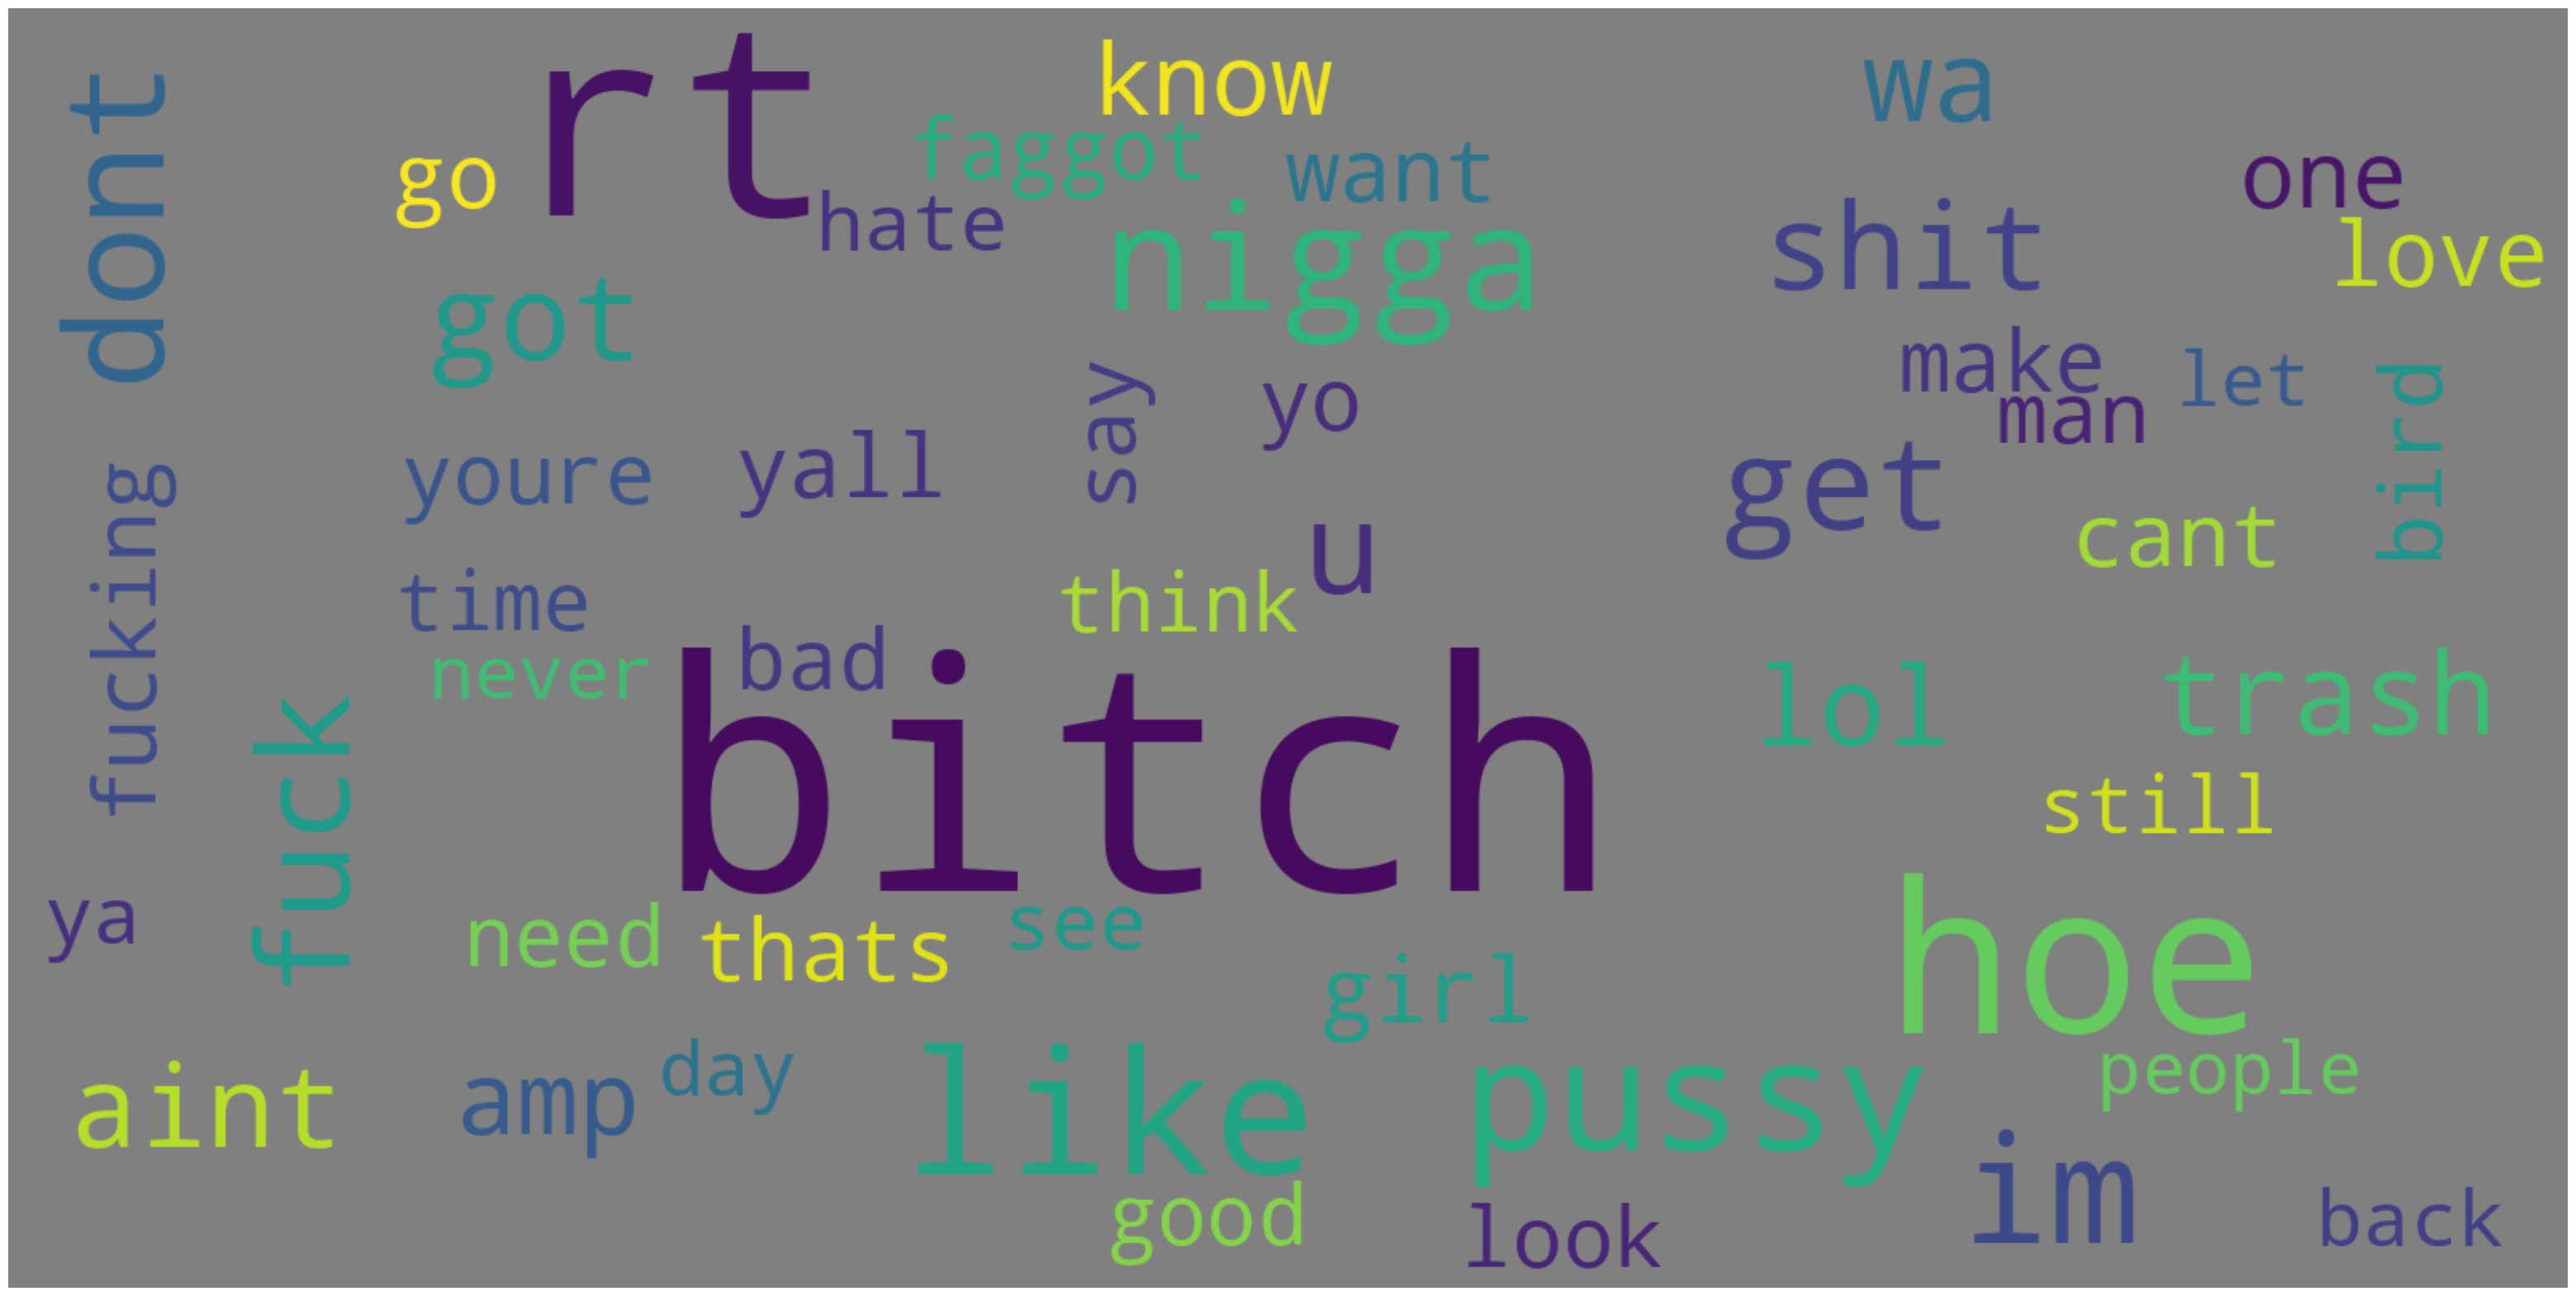

In [12]:
string = pd.Series(new_list).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stop_words,height=800,max_font_size=200,max_words=50,collocations=False, background_color='grey').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

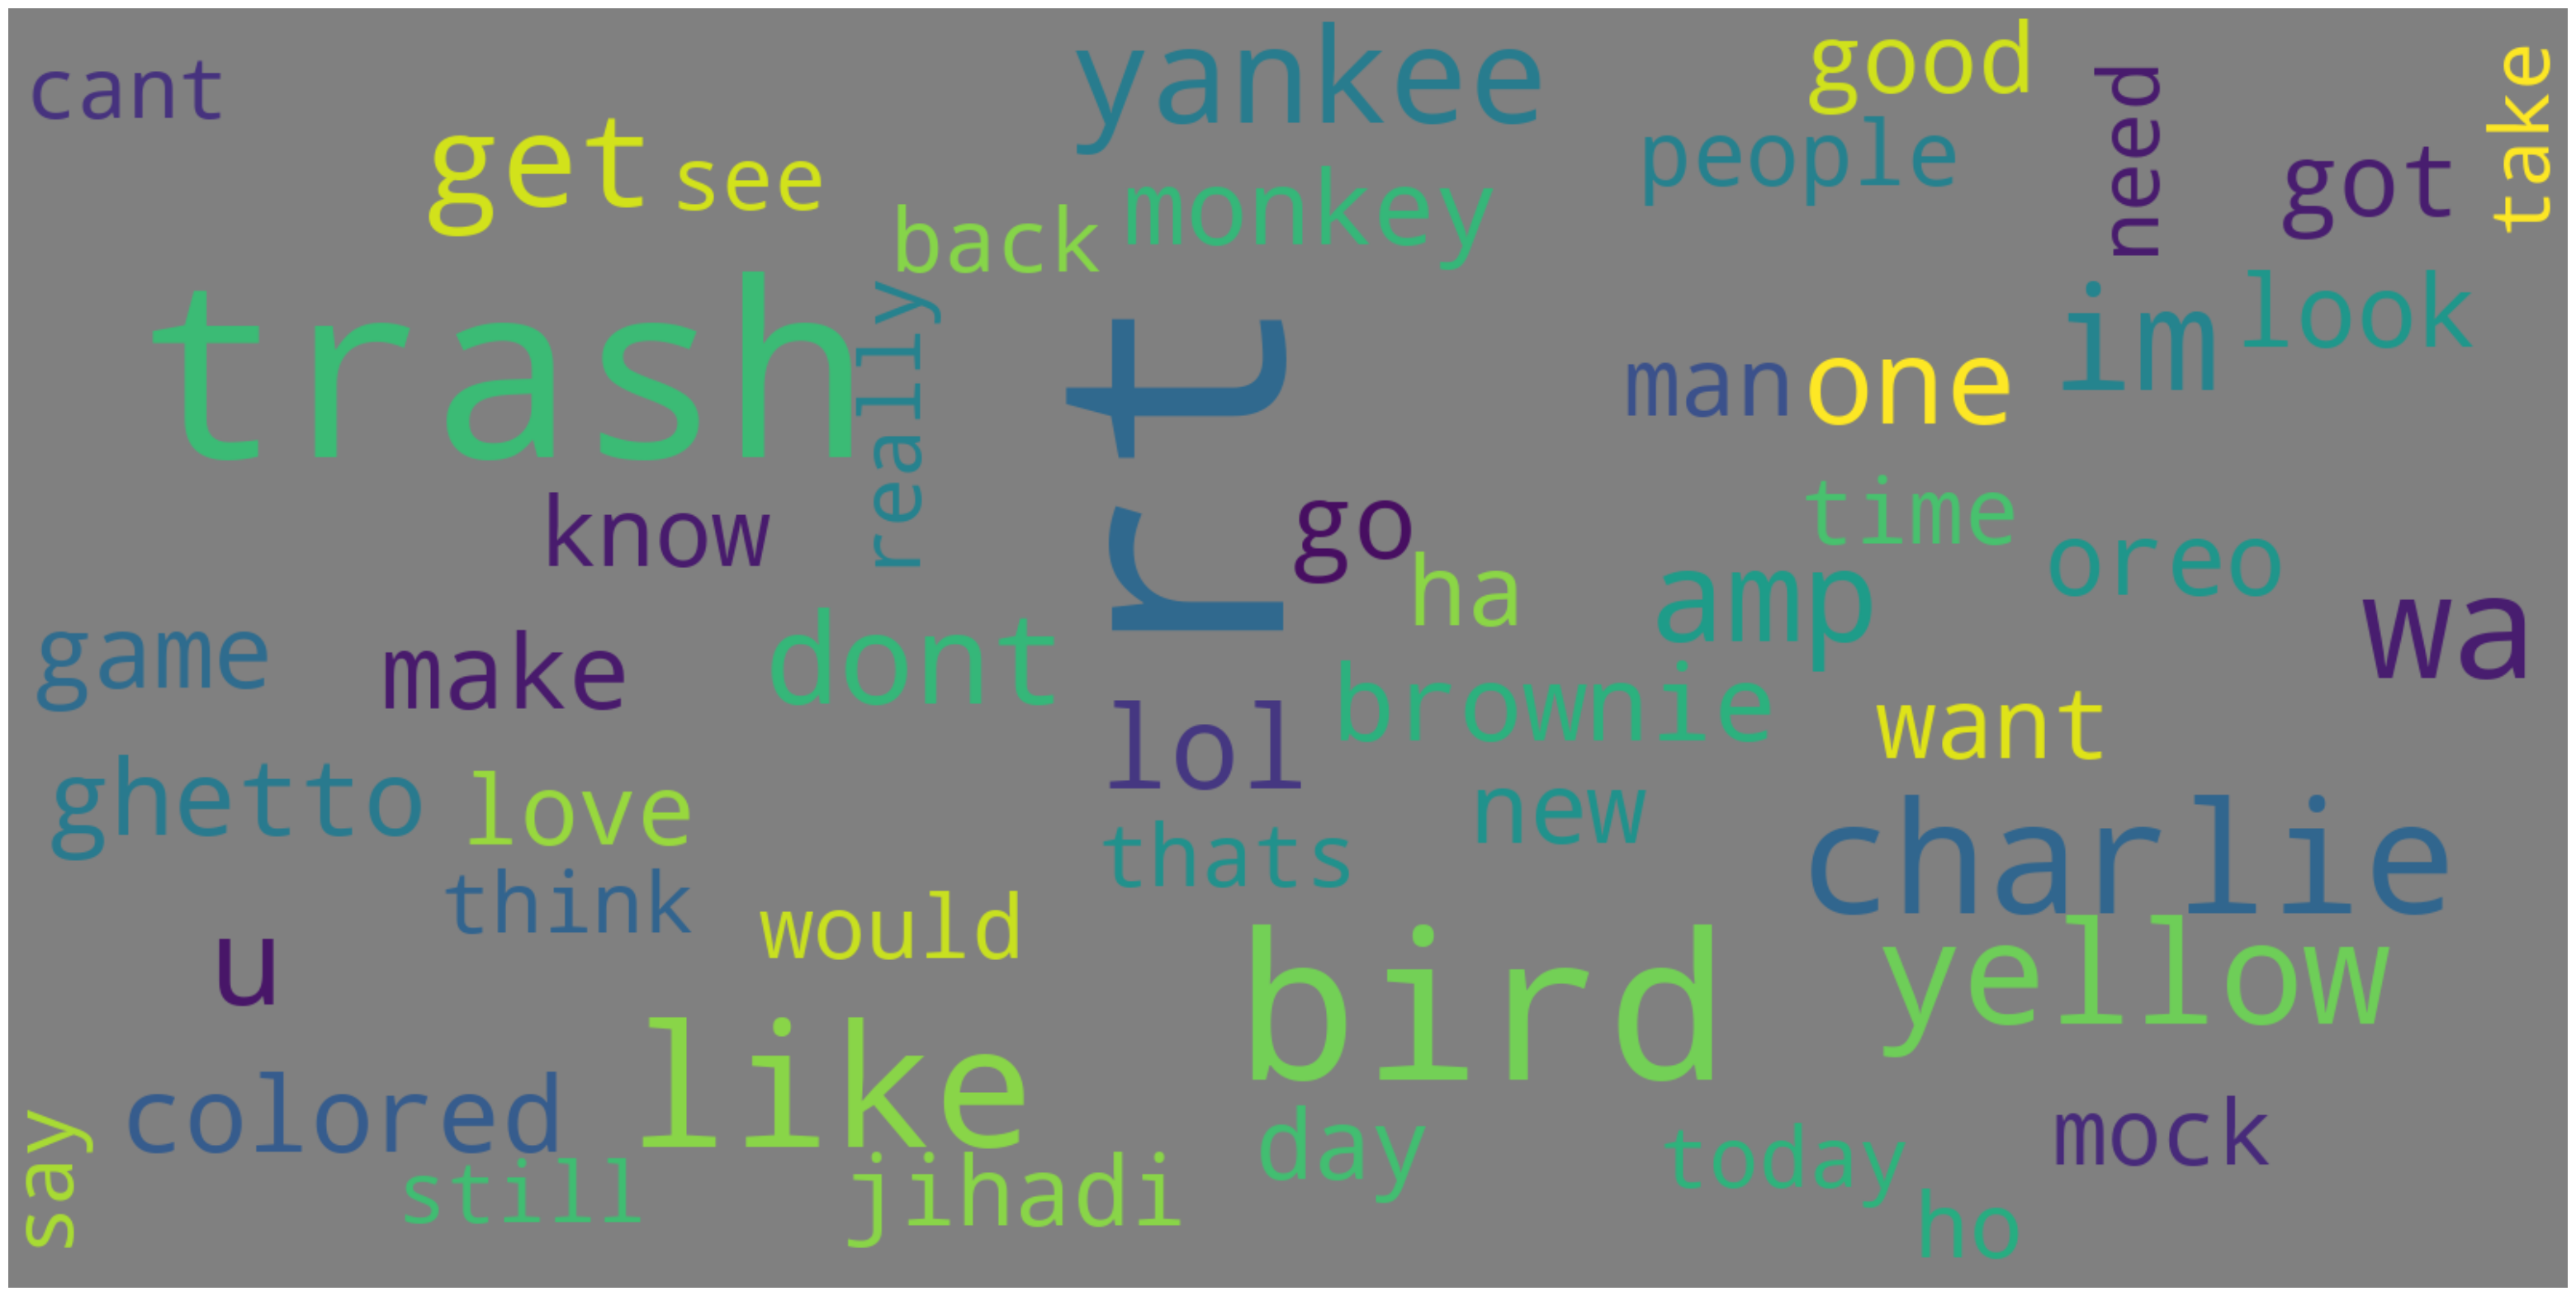

In [21]:
our_list = tweets['text'][tweets["class"]==2].tolist()

# step 2: Make a new empty list and build it up
new_list = []
for words in our_list:
    new_list += words

string = pd.Series(new_list).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stop_words,height=800,max_font_size=200,max_words=50,collocations=False, background_color='grey').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

implementing bag of words:

In [13]:
# Creating the Bag of Words model
word2count = {}
for data in new_list:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

KeyboardInterrupt: ignored

In [ ]:
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

In [ ]:
X = []
for data in new_list:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [ ]:
#print(X)

In [ ]:
from gensim.models import Word2Vec



model = Word2Vec(words,vector_size=100 ,window=5, min_count=1, workers=4)



In [ ]:
import torchtext.vocab as vocab

glove = vocab.GloVe(name='6B', dim=100)
print(glove.vectors.shape)
print(glove.stoi['hello'])


In [ ]:
import nltk
from gensim.models import Word2Vec

words = []
for data in new_list:
    words += nltk.word_tokenize(data)

model = Word2Vec(words, vector_size=100, window=5, min_count=1, workers=4)

print(model.wv['bitch'])


In [ ]:
import nltk
from gensim.models import Word2Vec
sentences = []
words = []
for data in new_list:
    words = nltk.word_tokenize(data)
    sentences.append(words)

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
#print(model.key)
print(model.wv['woman'])


In [ ]:
import gensim.downloader as api
import nltk

word_tokens = []
for sentence in new_list:
    # Tokenize sentence into individual words
    tokens = nltk.word_tokenize(sentence)
    # Remove stop words
    tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in nltk.corpus.stopwords.words('english')]
    word_tokens.append(tokens)

# Step 2: load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Step 3: map words to GloVe embeddings
embedding_matrix = []
for sentence in word_tokens:
    sentence_embeddings = []
    for word in sentence:
        if word in glove_model.vocab:
            sentence_embeddings.append(glove_model[word])
    embedding_matrix.append(sentence_embeddings)


In [ ]:
import gensim.downloader as api
import nltk
# Step 2: load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")
glove_model_words = list(glove_model.index_to_key)
# Step 3: map words to GloVe embeddings
embedding_matrix = []
for sentence in sentences:
    sentence_embeddings = []
    for word in sentence:
        if word in glove_model_words:
            sentence_embeddings.append(glove_model[word])
    embedding_matrix.append(sentence_embeddings)


In [ ]:
import fasttext

# Set the path to the training data
train_data = "train.txt"

# Train a FastText model
model = fasttext.train_unsupervised(train_data, model='skipgram')

# Get the vector representation of a word
print(model['hello'])

# Get the k most similar words to a given word
print(model.get_nearest_neighbors('hello', k=5))


In [ ]:

# Step 2: load pre-trained FastText embeddings
fasttext_model = api.load("fasttext-wiki-news-subwords-300")
fasttext_model_words = list(fasttext_model.index_to_key)
# Step 3: map words to FastText embeddings
embedding_matrix = []
for sentence in sentences:
    sentence_embeddings = []
    for word in sentence:
        if word in fasttext_model_words:
            sentence_embeddings.append(fasttext_model[word])
    embedding_matrix.append(sentence_embeddings)


In [ ]:
tweets.info()

In [ ]:
tweets.head(15)
